<a href="https://colab.research.google.com/github/yvsr7/DeeplearningJ055/blob/master/J055_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building powerful image classification models using very little data

Aim is to build a powerful image classifier, using only very few training examples

Our setup: only 2000 training examples (1000 per class)



Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


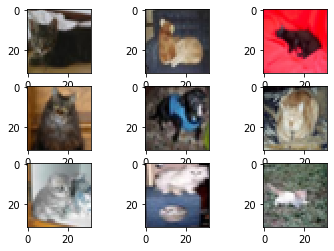

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

#Input image dimensions
img_rows, img_cols = 32, 32
num_classes = 2
#The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))
y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)
x_train = x_train[train_picks]
x_test = x_test[test_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    
#Show the plot
plt.show()

#Create an image generator from ImageDataGenerator()

##Randomly Rotate Images

1. First we need to create an image generator by calling the ImageDataGenerator() function and pass it a list of parameters describing the alterations that we want it to perform on the images. 
2. We will then call the fit() function on our image generator which will apply the changes to the images batch by batch.
3. You can also use keras.preprocessing to export augmented image files to a folder in order to build up a giant dataset of altered images should you desire to do so.

##Randomly Rotate Images

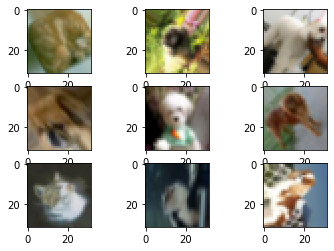

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
# Rotate images by 90 degrees
datagen = ImageDataGenerator(rotation_range=90)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#Flip Images Vertically


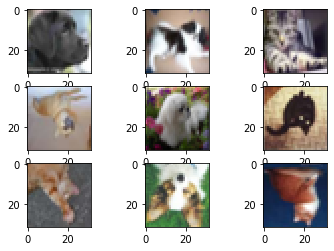

In [0]:
# Flip images vertically
datagen = ImageDataGenerator(vertical_flip=True)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#Shift Images Vertically or Horizontally by 20%

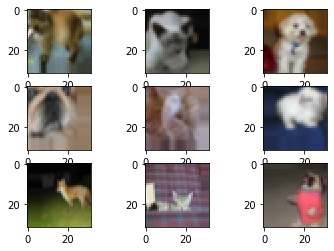

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(width_shift_range=.2, 
                             height_shift_range=.2,
                             fill_mode='nearest')

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#featurewise_center: Boolean. 

Set input mean to 0 over the dataset, feature-wise.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


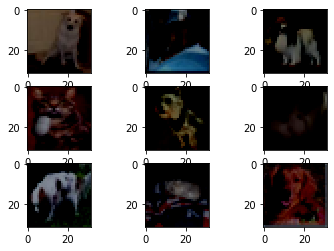

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(featurewise_center=True)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#samplewise_center: Boolean. 

Set each sample mean to 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


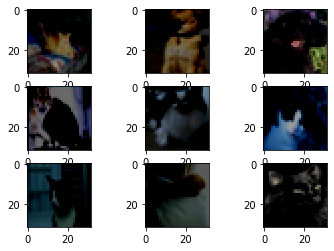

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(samplewise_center=True)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#featurewise_std_normalization: Boolean. 

Divide inputs by std of the dataset, feature-wise.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data 

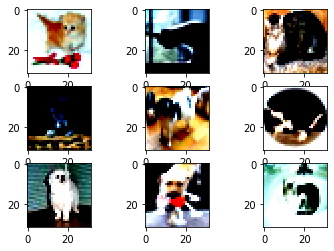

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#samplewise_std_normalization: Boolean. 

Divide each input by its std.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:355: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([

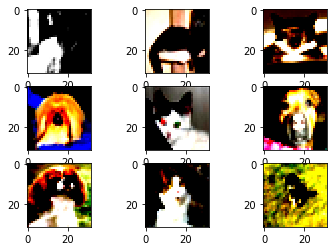

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(samplewise_std_normalization=True)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#zca_epsilon: epsilon for ZCA whitening. 

Default is 1e-6.

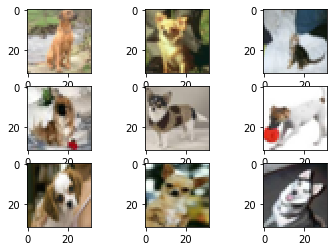

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(zca_epsilon=1e-05)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#zca_whitening: Boolean. 

Apply ZCA whitening

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floa

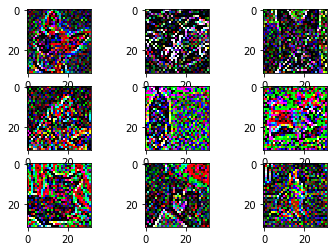

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(zca_whitening=True)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#rotation_range: Int. 

Degree range for random rotations.

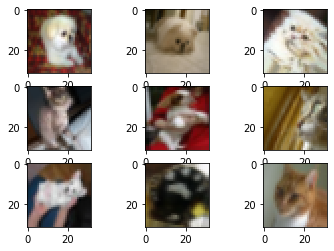

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(rotation_range=30)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#width_shift_range: Float, 1-D array-like or int

1. float: fraction of total width, if < 1, or pixels if >= 1.
2. 1-D array-like: random elements from the array.
3. int: integer number of pixels from interval (-width_shift_range, +width_shift_range)

With width_shift_range=2 possible values are integers [-1, 0, +1], same as with width_shift_range=[-1, 0, +1], while with width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).

#height_shift_range: Float, 1-D array-like or int

1. float: fraction of total height, if < 1, or pixels if >= 1.
2. 1-D array-like: random elements from the array.
3. int: integer number of pixels from interval (-height_shift_range, +height_shift_range)

With height_shift_range=2 possible values are integers [-1, 0, +1], same as with height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).

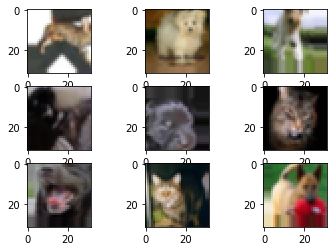

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#brightness_range: Tuple or list of two floats. 

Range for picking a brightness shift value from.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


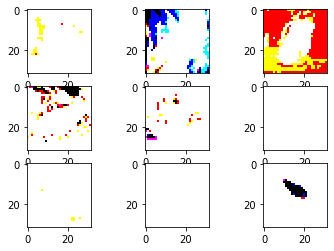

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(brightness_range=[0.05,0.06])

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break


#Other preprocessing

1. shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
2. zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
channel_shift_range: Float. Range for random channel shifts.
3. fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:
6. horizontal_flip: Boolean. Randomly flip inputs horizontally.
7. vertical_flip: Boolean. Randomly flip inputs vertically.
8. rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).

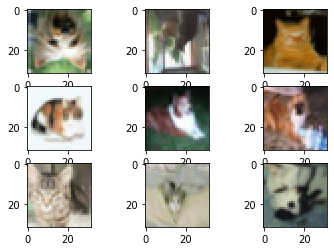

In [0]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(shear_range=0.1,zoom_range=0.1,fill_mode="nearest",horizontal_flip=True,vertical_flip=True,rescale=0)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

#Saving Augmented Images to File

The data preparation and augmentation is performed just in time by Keras.

This is efficient in terms of memory, but you may require the exact images used during training. For example, perhaps you would like to use them with a different software package later or only generate them once and use them on multiple different deep learning models or configurations.

Keras allows you to save the images generated during training. The directory, filename prefix and image file type can be specified to the flow() function before training. Then, during training, the generated images will be written to file.

The example below demonstrates this and writes 9 images to a “images” subdirectory with the prefix “aug” and the file type of PNG.

11493376/11490434 [==============================] - 0s 0us/step


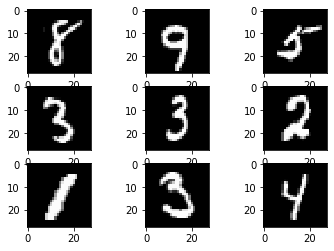

In [0]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#Examples

Training models on augmented data on CIFAR 10

In [0]:
import keras
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

epochs=10

#import dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)

adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

#Model building
initializer = keras.initializers.lecun_normal(seed=None)

model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(1024, (32, 32), padding="valid", activation="relu", input_shape=X_train.shape[1:],kernel_initializer=initializer, bias_initializer=initializer))
model.add(Flatten())
#then we continue with the neural network.
model.add(Dense(1024,kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(512,kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(512,kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(10,kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adamax',
                  metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train),epochs=epochs,verbose=1, validation_data=datagen.flow(X_test, Y_test))








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





1563/1563 [==============================] - 49s 31ms/step - loss: 1.8970 - acc: 0.3168 - val_loss: 1.7745 - val_acc: 0.3640
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7567 - acc: 0.3696 - val_loss: 1.6998 - val_acc: 0.3911
Epoch 3/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.6854 - acc: 0.3930 - val_loss: 1.6656 - val_acc: 0.4059
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6513 - acc: 0.4065 - val_loss: 1.6355 - val_acc: 0.4128
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6204 - acc: 0.4201 - val_loss: 1.5991 - val_acc: 0.4291
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5906 - acc: 0.4325 - val_loss: 1.5878 - val_acc: 0.4355
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss:

In [0]:
import keras
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

epochs=10

#import dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)

adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

#Model building
initializer = keras.initializers.lecun_normal(seed=None)

model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(1024, (32, 32), padding="valid", activation="relu", input_shape=X_train.shape[1:],kernel_initializer=initializer, bias_initializer=initializer))
model.add(Flatten())
#then we continue with the neural network.
model.add(Dense(1024,kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(512,kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(512,kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(10,kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adamax',
                  metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train),epochs=epochs,verbose=1, validation_data=datagen.flow(X_test, Y_test))



Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.8930 - acc: 0.3131 - val_loss: 1.7902 - val_acc: 0.3522
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7547 - acc: 0.3707 - val_loss: 1.6896 - val_acc: 0.3903
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.6909 - acc: 0.3923 - val_loss: 1.6667 - val_acc: 0.4003
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6539 - acc: 0.4071 - val_loss: 1.6545 - val_acc: 0.4066
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6192 - acc: 0.4185 - val_loss: 1.6378 - val_acc: 0.4221
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5971 - acc: 0.4294 - val_loss: 1.5964 - val_acc: 0.4286
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5698 - acc: 0.4361 - val_loss: 1.5562 - val_acc: 0.4399
Epoch 8/10
1563/1563 [==========================

Accuracy: 0.4548,
Validation Accuracy: 0.4598

#Thank you for completing this notebook

##CIFAR100

In [0]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar100
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

epochs=10

#import dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()


#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 100)
Y_test =  to_categorical(y_test, 100)



model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(1024, (32, 32), padding="valid", activation="relu", input_shape=X_train.shape[1:]))
model.add(Flatten())
#then we continue with the neural network.
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train),epochs=epochs,verbose=1, validation_data=datagen.flow(X_test, Y_test))

169009152/169001437 [==============================] - 2s 0us/step

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 4.1277 - acc: 0.0692 - val_loss: 3.9543 - val_acc: 0.0917
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 3.8895 - acc: 0.1020 - val_loss: 3.8685 - val_acc: 0.1044
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 3.7917 - acc: 0.1150 - val_loss: 3.7799 - val_acc: 0.1193
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 3.7375 - acc: 0.1220 - val_loss: 3.7120 - val_acc: 0.1321
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 3.7024 - acc: 0.1283 - val_loss: 3.7185 - val_acc: 0.1365
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 3.6698 - acc: 0.1330 - val_loss: 3.6885 - val_acc: 0.1300
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 3.6474 - acc: 0.1388 - val_loss: 3.663

Accuracy: 0.1468,
Validation Accuracy: 0.1431

##MNIST

In [0]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

epochs=10

#import dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28,28,1))
#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)


model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(1024, (28, 28), padding="valid", activation="relu", input_shape=X_train.shape[1:]))
model.add(Flatten())
#then we continue with the neural network.
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train),epochs=epochs,verbose=1, validation_data=datagen.flow(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.8560 - acc: 0.7084 - val_loss: 0.5391 - val_acc: 0.8231
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.5105 - acc: 0.8321 - val_loss: 0.4394 - val_acc: 0.8602
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4315 - acc: 0.8593 - val_loss: 0.3933 - val_acc: 0.8744
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3906 - acc: 0.8750 - val_loss: 0.3531 - val_acc: 0.8873
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3614 - acc: 0.8855 - val_loss: 0.3190 - val_acc: 0.8974
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3365 - acc: 0.8919 - val_loss: 0.3305 - val_acc: 0.8959
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3227 - acc: 0.8971 - val_loss: 0.3157 - val_acc: 0.9008
Epoch 8/10
1875/1875 [==========================

Accuracy: 0.9098,
Validation Accuracy: 0.9091

##Fashion MNIST

In [0]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

epochs=10

#import dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28,28,1))
#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)

model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(1024, (28, 28), padding="valid", activation="relu", input_shape=X_train.shape[1:]))
model.add(Flatten())
#then we continue with the neural network.
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train),epochs=epochs,verbose=1, validation_data=datagen.flow(X_test, Y_test))

4423680/4422102 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.9597 - acc: 0.6346 - val_loss: 0.8306 - val_acc: 0.6857
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7831 - acc: 0.7031 - val_loss: 0.7963 - val_acc: 0.6992
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7316 - acc: 0.7171 - val_loss: 0.7400 - val_acc: 0.7158
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.7000 - acc: 0.7334 - val_loss: 0.7097 - val_acc: 0.7300
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6800 - acc: 0.7415 - val_loss: 0.6788 - val_acc: 0.7437
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6591 - acc: 0.7499 - val_loss: 0.6691 - val_acc: 0.7431
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.6420 - acc: 0.7577 - val_loss: 0.6455 - v

In [0]:
Accuracy: 0.7679
Validation Accuracy: 0.7621